In [1]:
import sys
import os
import yaml
import numpy as np

from loaders.usgs_loader import USGSLoader
from interpolation.usgs_krig import USGSKrig

In [2]:
cfg = "../configs/usgsgaugekrig.yaml"
loader = USGSLoader(cfg)
year, month, day = 2025, 7, 1
data = loader.get_streamflow(year, month, day)

[bbox] Dropped 193 record(s) outside -125.000,24.000,-66.000,50.000
[cache] Summary for 2025-07-01 (after bbox filter)
  - Observations: 6528
  - Min: -17.35, Max: 61.88, Mean: 2.37


In [3]:
krig = USGSKrig(data, cfg, year, month, day)

In [4]:
# Compute kriging first
krig.compute_kriging()

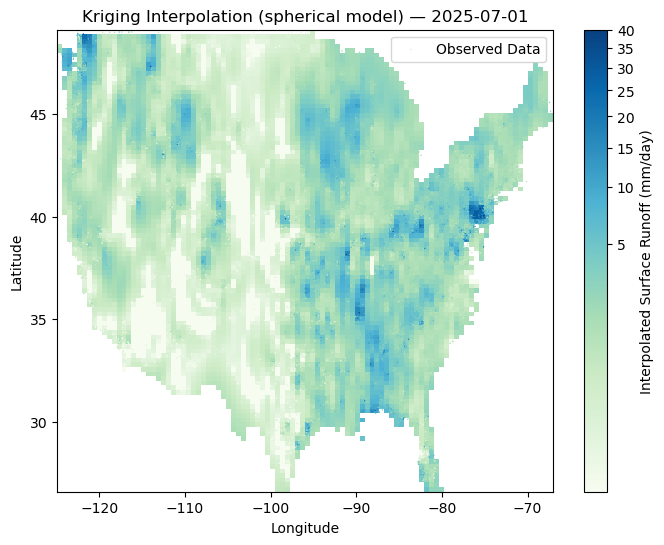

In [5]:
# Generate the kriging interpolation map
krig.map_krig_interpolation()

In [6]:
# Compute semivariance first
krig.compute_semivariogram()

(array([  92.34616318,  277.03848954,  461.7308159 ,  646.42314225,
         831.11546861, 1015.80779497, 1200.50012133, 1385.19244769,
        1569.88477405, 1754.5771004 , 1939.26942676, 2123.96175312,
        2308.65407948, 2493.34640584, 2678.0387322 , 2862.73105855,
        3047.42338491, 3232.11571127, 3416.80803763, 3601.50036399,
        3786.19269035, 3970.88501671, 4155.57734306, 4340.26966942,
        4524.96199578]),
 array([38.37775662, 36.771603  , 34.15261145, 29.83254181, 29.87373896,
        29.09476303, 26.45760639, 27.14619709, 26.64218716, 27.06435068,
        27.64103954, 28.32517641, 27.98845235, 28.59952068, 31.34899527,
        31.48691554, 36.96957092, 35.3697236 , 31.54006796, 32.28408052,
        59.2627262 , 50.65607473, 18.31318739,  4.50266814,  3.19275087]))

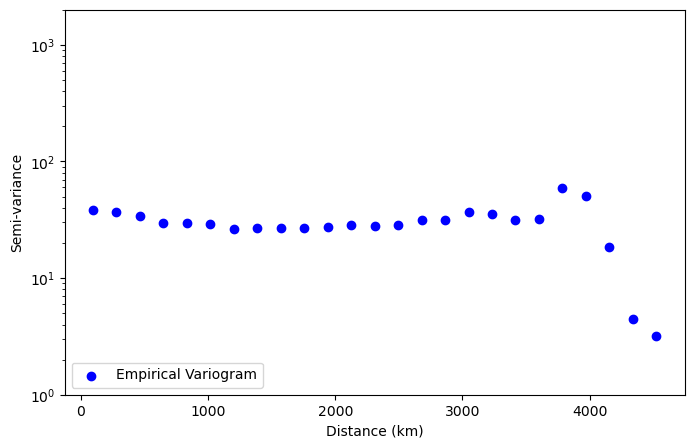

In [7]:
# Plot the variogram
krig.plot_variogram()

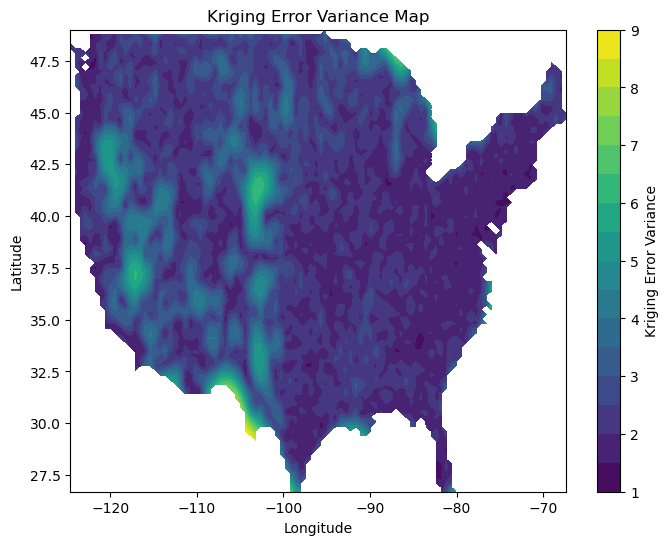

In [8]:
# Generate the kriging error variance map
krig.map_krig_error_variance()

In [9]:
interp_path, vario_path = krig.export_all()
print("data exported to")
print(interp_path)
print(vario_path)

data exported to
/media/volume/ml_ngen/usgskrig/exports/interp_2025-07-01.npz
/media/volume/ml_ngen/usgskrig/exports/variogram_2025-07-01.csv


In [10]:
z = np.asarray(krig.z_interp)
pos = z[z > 0]
print("pos count:", pos.size, "min:", pos.min(), "max:", pos.max())

pos count: 9455 min: 7.267677579812654e-05 max: 28.564109266954514


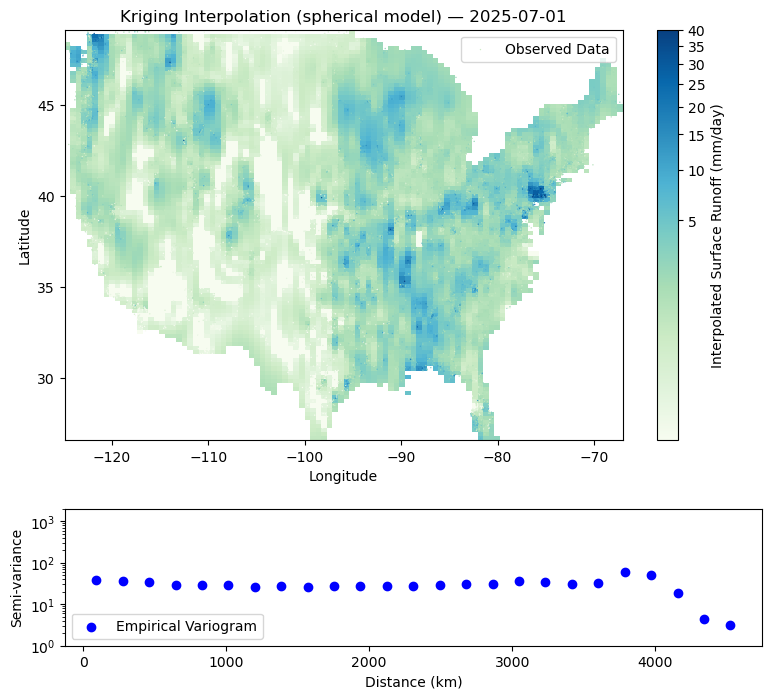

In [11]:
krig.plot_interpolation_with_variogram()